<a href="https://colab.research.google.com/github/mong-pnh/DS24-CoderSchool2020/blob/master/Copy_of_Copy_of_Team_4_TED_Talks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 4 - TED Talks

![](https://psmarketingimages.s3.amazonaws.com/blog/wp-content/uploads/2017/04/23103819/TED-Talks-for-Small-Business-and-Entrepreneurs.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/rounakbanik/ted-talks)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- The `ratings` column is in dictionary format. How should we handle them?
- Same for `related_talks` and `tags` column
- Can you find the `year` of the talks?
- And more...

In [ ]:
# Start your codes here!

#Load the dataset 



In [ ]:
# copy from different colabs in DS24 class 
from __future__ import division, print_function, unicode_literals
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# how to make a link?
from google.colab import files
data_to_load = files.upload()

Saving ted.csv to ted.csv


In [ ]:
ted = pd.read_csv('ted.csv',engine='python', error_bad_lines=False)

## [Overall] Try basic Exploratory Data Analysis on the dataset

In [ ]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [ ]:
ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [ ]:
ted.corr()
# speakable numbers: 0.531471 (views and comments), 0.868559 (film_date, published_date), 0.387966 (views and languages)

,comments,duration,film_date,languages,num_speaker,published_date,views
comments,1.000000,0.140694,-0.133303,0.318284,-0.035489,-0.185936,0.530939
duration,0.140694,1.000000,-0.242941,-0.295681,0.022257,-0.166324,0.048740
film_date,-0.133303,-0.242941,1.000000,-0.061957,0.040227,0.902565,0.006447
languages,0.318284,-0.295681,-0.061957,1.000000,-0.063100,-0.171836,0.377623
num_speaker,-0.035489,0.022257,0.040227,-0.063100,1.000000,0.049240,-0.026389
published_date,-0.185936,-0.166324,0.902565,-0.171836,0.049240,1.000000,-0.017920
views,0.530939,0.048740,0.006447,0.377623,-0.026389,-0.017920,1.000000


In [ ]:
ted.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


In [ ]:
ted.shape

(2550, 17)

In [ ]:
ted.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

### [Tag]The ratings, related_talks, tags column are in dictionary format. How should we handle them? 

In [ ]:
ted['ratings'][1]
# String type

"[{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, 'name': 'Beautiful', 'count': 58}, {'id': 21, 'name': 'Unconvincing', 'count': 258}, {'id': 11, 'name': 'Longwinded', 'count': 113}, {'id': 8, 'name': 'Informative', 'count': 443}, {'id': 10, 'name': 'Inspiring', 'count': 413}, {'id': 22, 'name': 'Fascinating', 'count': 132}, {'id': 9, 'name': 'Ingenious', 'count': 56}, {'id': 24, 'name': 'Persuasive', 'count': 268}, {'id': 23, 'name': 'Jaw-dropping', 'count': 116}, {'id': 26, 'name': 'Obnoxious', 'count': 131}, {'id': 25, 'name': 'OK', 'count': 203}]"

In [ ]:
ted['related_talks'][1]
# Let's expand a cell and try to access some link
# String type

'[{\'id\': 243, \'hero\': \'https://pe.tedcdn.com/images/ted/566c14767bd62c5ff760e483c5b16cd2753328cd_2880x1620.jpg\', \'speaker\': \'Al Gore\', \'title\': \'New thinking on the climate crisis\', \'duration\': 1674, \'slug\': \'al_gore_s_new_thinking_on_the_climate_crisis\', \'viewed_count\': 1751408}, {\'id\': 547, \'hero\': \'https://pe.tedcdn.com/images/ted/89288_800x600.jpg\', \'speaker\': \'Ray Anderson\', \'title\': \'The business logic of sustainability\', \'duration\': 954, \'slug\': \'ray_anderson_on_the_business_logic_of_sustainability\', \'viewed_count\': 881833}, {\'id\': 2093, \'hero\': \'https://pe.tedcdn.com/images/ted/146d88845861cbf768bbf8bec8b2e41f8bfc7903_2400x1800.jpg\', \'speaker\': \'Lord Nicholas Stern\', \'title\': \'The state of the climate — and what we might do about it\', \'duration\': 993, \'slug\': \'lord_nicholas_stern_the_state_of_the_climate_and_what_we_might_do_about_it\', \'viewed_count\': 773779}, {\'id\': 2784, \'hero\': \'https://pe.tedcdn.com/imag

In [ ]:
ted['tags'][1]
# String type

"['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']"

In [ ]:
# Try some more 
ted['ratings'][0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [ ]:
# Try some more 
ted['related_talks'][2]

"[{'id': 1725, 'hero': 'https://pe.tedcdn.com/images/ted/b7f415a054cc0a2bfdd90d0ad5a7f64cf060150d_1600x1200.jpg', 'speaker': 'David Pogue', 'title': '10 top time-saving tech tips', 'duration': 344, 'slug': 'david_pogue_10_top_time_saving_tech_tips', 'viewed_count': 4843421}, {'id': 2274, 'hero': 'https://pe.tedcdn.com/images/ted/608e677e4392bcdcf82b068fa221b9df74a213ef_2880x1620.jpg', 'speaker': 'Tony Fadell', 'title': 'The first secret of design is ... noticing', 'duration': 1001, 'slug': 'tony_fadell_the_first_secret_of_design_is_noticing', 'viewed_count': 2005916}, {'id': 172, 'hero': 'https://pe.tedcdn.com/images/ted/b790be2f87ceffba73fe73837944400c7d61cba2_1600x1200.jpg', 'speaker': 'John Maeda', 'title': 'Designing for simplicity', 'duration': 959, 'slug': 'john_maeda_on_the_simple_life', 'viewed_count': 1215942}, {'id': 2664, 'hero': 'https://pe.tedcdn.com/images/ted/092f184f6625c2aeef10949c8d7b2aa14ba4132b_2880x1620.jpg', 'speaker': 'Dan Bricklin', 'title': 'Meet the inventor o

In [ ]:
# Try some more 
ted['tags'][2]

"['computers', 'entertainment', 'interface design', 'media', 'music', 'performance', 'simplicity', 'software', 'technology']"

#### Observation
- The 'id', 'name' is unique and unstable; the 'count' is varying
- Make a new tables with the 'ID', 'name' and 'count' in ratings
- Fix problems in formating the column 'related_talks'
- Convert string into dict, list type

#### Next steps
- List all the tags
- Discovery the relationship between talks
- Understand the ratings and its components' meanings

### [Time] Can you find the year of the talks?

In [ ]:
# Guess: The year is relevant to 'event','film_date','published_date'
ted[['event','film_date','published_date']]
# Look at the table: The name of the event might spoil the year of the talks, except "TEDxBeaconStreet"	

,event,film_date,published_date
0,TED2006,1140825600,1151367060
1,TED2006,1140825600,1151367060
2,TED2006,1140739200,1151367060
3,TED2006,1140912000,1151367060
4,TED2006,1140566400,1151440680
...,...,...,...
2545,TED2017,1496707200,1505851216
2546,TED2017,1492992000,1505919737
2547,TED2017,1492992000,1506006095
2548,TEDxMileHigh,1499472000,1506024042


In [ ]:
# Use value_counts() function to returns object containing: counts of unique values & in descending 
ted['event'].value_counts()

TED2014             84
TED2009             83
TED2016             77
TED2013             77
TED2015             75
                    ..
DLD 2007             1
TEDxBoston 2010      1
TEDxUCL              1
TEDxColbyCollege     1
TEDxBG               1
Name: event, Length: 355, dtype: int64

In [ ]:
# Use dt.strftime() to remove '%H-%m-%s' 
ted['published_date'] = pd.to_datetime(ted['published_date']).dt.strftime('%d-%m-%Y')
ted['film_date'] = pd.to_datetime(ted['film_date']).dt.strftime('%d-%m-%Y')

In [ ]:
# Check again!
ted[['event','film_date','published_date']]

,event,film_date,published_date
0,TED2006,01-01-1970,01-01-1970
1,TED2006,01-01-1970,01-01-1970
2,TED2006,01-01-1970,01-01-1970
3,TED2006,01-01-1970,01-01-1970
4,TED2006,01-01-1970,01-01-1970
...,...,...,...
2545,TED2017,01-01-1970,01-01-1970
2546,TED2017,01-01-1970,01-01-1970
2547,TED2017,01-01-1970,01-01-1970
2548,TEDxMileHigh,01-01-1970,01-01-1970


### [Time] Can you find the year of the talks?

In [ ]:
# Set up
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

0       Jan
1       Jan
2       Jan
3       Jan
4       Jan
       ... 
2545    Jan
2546    Jan
2547    Jan
2548    Jan
2549    Jan
Name: month, Length: 2550, dtype: object


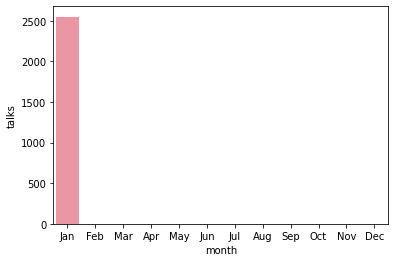

In [ ]:
# Month and talks
ted['month'] = ted['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])
print(ted['month'])
month_ted = ted['month'].value_counts().reset_index()
month_ted.columns = ['month', 'talks']
sns.barplot(x='month', y='talks', data= month_ted, order=month_order)

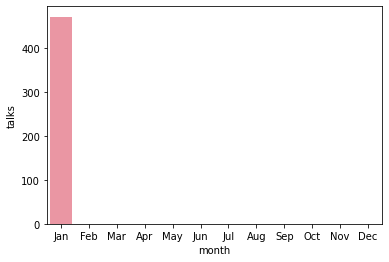

In [ ]:
ted_x = ted[ted['event'].str.contains('TEDx')]
x_month_ted = ted_x['month'].value_counts().reset_index()
x_month_ted.columns = ['month', 'talks']
sns.barplot(x='month', y='talks', data=x_month_ted, order=month_order)

In [ ]:
def getday(x):
    day, month, year = (int(i) for i in x.split('-'))    
    answer = datetime.date(year, month, day).weekday()
    return day_order[answer]

In [ ]:
ted['day'] = ted['film_date'].apply(getday)

In [ ]:
day_ted = ted['day'].value_counts().reset_index()
day_ted.columns = ['day', 'talks']

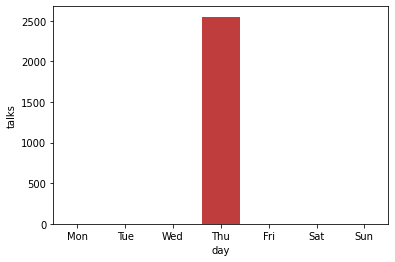

In [ ]:
sns.barplot(x='day', y='talks', data=day_ted, order=day_order)

In [ ]:
ted['year'] = ted['film_date'].apply(lambda x: x.split('-')[2])
year_ted = ted['year'].value_counts().reset_index()
year_ted.columns = ['year', 'talks']

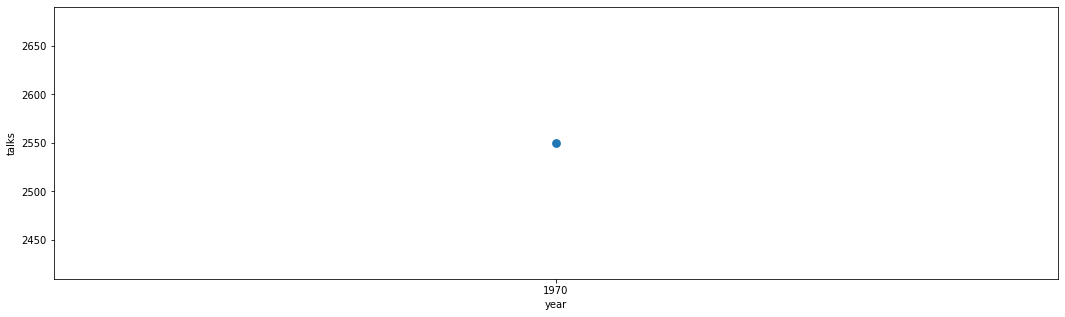

In [ ]:
plt.figure(figsize=(18,5))
sns.pointplot(x='year', y='talks', data=year_ted)

In [ ]:
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

In [ ]:
hmap_ted = ted.copy()
hmap_ted['film_date'] = hmap_ted['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1] + " " + str(x.split('-')[2]))
hmap_ted = pd.pivot_table(hmap_ted[['film_date', 'title']], index='film_date', aggfunc='count').reset_index()
hmap_ted['month_num'] = hmap_ted['film_date'].apply(lambda x: months[x.split()[0]])
hmap_ted['year'] = hmap_ted['film_date'].apply(lambda x: x.split()[1])
hmap_ted = hmap_ted.sort_values(['year', 'month_num'])
hmap_ted = hmap_ted[['month_num', 'year', 'title']]
hmap_ted = hmap_ted.pivot('month_num', 'year', 'title')
hmap_ted = hmap_ted.fillna(0)

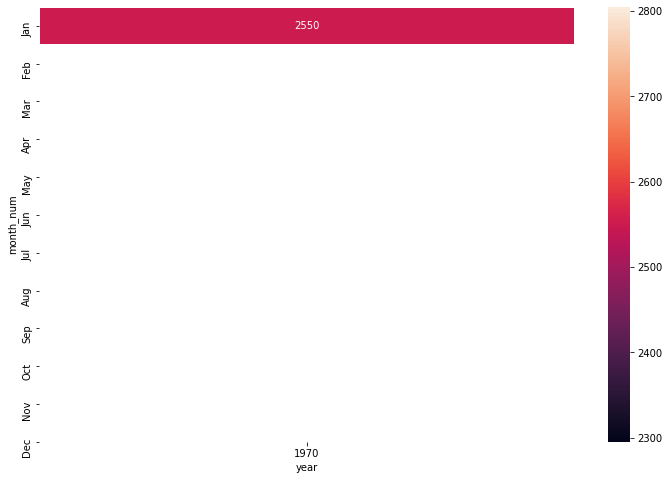

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(hmap_ted, annot=True, linewidths=.5, ax=ax, fmt='n', yticklabels=month_order)

In [ ]:
speaker_ted = ted.groupby('main_speaker').count().reset_index()[['main_speaker', 'comments']]
speaker_ted.columns = ['main_speaker', 'appearances']
speaker_ted = speaker_ted.sort_values('appearances', ascending=False)
speaker_ted.head(10)

In [ ]:
occupation_ted = ted.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation_ted.columns = ['occupation', 'appearances']
occupation_ted = occupation_ted.sort_values('appearances', ascending=False)

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='occupation', y='appearances', data=occupation_ted.head(10))
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='speaker_occupation', y='views', data=ted[ted['speaker_occupation'].isin(occupation_ted.head(10)['occupation'])], palette="muted", ax =ax)
ax.set_ylim([0, 0.4e7])
plt.show()

In [ ]:
ted['num_speaker'].value_counts()

In [ ]:
ted[ted['num_speaker'] == 4][['title', 'description', 'main_speaker', 'event']]

In [ ]:
events_ted = ted[['title', 'event']].groupby('event').count().reset_index()
events_ted.columns = ['event', 'talks']
events_ted = events_ted.sort_values('talks', ascending=False)
events_ted.head(10)

In [ ]:
ted[ted['languages'] == 72]

In [ ]:
sns.jointplot(x='languages', y='views', data=ted)
plt.show()

### [Speaker]

In [ ]:
ted['main_speaker'].nunique()

In [ ]:
ted['speaker_occupation'].nunique()

# Outline
1.   Decode the time
2.   Use the ratings in useful way
3.   Extract insights



In [ ]:
import datetime
ted['film_date'] = ted['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
ted['published_date'] = ted['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [ ]:
# Reorder the table
ted = ted[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]

In [ ]:
ted.head()

In [ ]:
pop_talks = ted[['title', 'main_speaker', 'views', 'film_date']].sort_values('views', ascending=False)[:15]
pop_talks

In [ ]:
pop_talks['abbr'] = pop_talks['main_speaker'].apply(lambda x: x[:3])
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='abbr', y='views', data=pop_talks)

In [ ]:
sns.distplot(ted['views'])

In [ ]:
sns.distplot(ted[ted['views'] < 0.4e7]['views'])

In [ ]:
sns.distplot(ted['comments'])

In [ ]:
sns.distplot(ted[ted['comments'] < 500]['comments'])

In [ ]:
sns.jointplot(x='views', y='comments', data=ted)

In [ ]:
ted[['title', 'main_speaker','views', 'comments']].sort_values('comments', ascending=False).head(10)

# Ted Topics

In [ ]:
import ast
ted['tags'] = ted['tags'].apply(lambda x: ast.literal_eval(x))

In [ ]:
s = ted.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'theme'

In [ ]:
theme_ted = ted.drop('tags', axis=1).join(s)
theme_ted.head()

In [ ]:
len(theme_ted['theme'].value_counts())

In [ ]:
pop_themes = theme_ted['theme'].value_counts().reset_index()
pop_themes.columns = ['theme', 'talks']
pop_themes.head(10)

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='theme', y='talks', data=pop_themes.head(10))
plt.show()

In [ ]:
pop_theme_talks = theme_ted[(theme_ted['theme'].isin(pop_themes.head(8)['theme'])) & (theme_ted['theme'] != 'TEDx')]
pop_theme_talks['year'] = pop_theme_talks['year'].astype('int')
pop_theme_talks = pop_theme_talks[pop_theme_talks['year'] > 2008]

In [ ]:
themes = list(pop_themes.head(8)['theme'])
themes.remove('TEDx')
ctab = pd.crosstab([pop_theme_talks['year']], pop_theme_talks['theme']).apply(lambda x: x/x.sum(), axis=1)
ctab[themes].plot(kind='bar', stacked=True, colormap='rainbow', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
ctab[themes].plot(kind='line', stacked=False, colormap='rainbow', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
pop_theme_talks = theme_ted[theme_ted['theme'].isin(pop_themes.head(10)['theme'])]
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='theme', y='views', data=pop_theme_talks, palette="muted", ax =ax)
ax.set_ylim([0, 0.4e7])

# Talk Duration and Word Counts

In [ ]:
ted['duration'] = ted['duration']/60
ted['duration'].describe()

In [ ]:
sns.jointplot(x='duration', y='views', data=ted[ted['duration'] < 25])
plt.xlabel('Duration')
plt.ylabel('Views')
plt.show()

# Ted Ratings

In [ ]:
ted.iloc[1]['ratings']

In [ ]:
ted['ratings'] = ted['ratings'].apply(lambda x: ast.literal_eval(x))

In [ ]:
ted['funny'] = ted['ratings'].apply(lambda x: x[0]['count'])
ted['jawdrop'] = ted['ratings'].apply(lambda x: x[-3]['count'])
ted['beautiful'] = ted['ratings'].apply(lambda x: x[3]['count'])
ted['confusing'] = ted['ratings'].apply(lambda x: x[2]['count'])
ted.head()

In [ ]:
ted[['title', 'main_speaker', 'views', 'published_date', 'funny']].sort_values('funny', ascending=False)[:10]

In [ ]:
ted[['title', 'main_speaker', 'views', 'published_date', 'beautiful']].sort_values('beautiful', ascending=False)[:10]

In [ ]:
ted[['title', 'main_speaker', 'views', 'published_date', 'jawdrop']].sort_values('jawdrop', ascending=False)[:10]

In [ ]:
ted[['title', 'main_speaker', 'views', 'published_date', 'confusing']].sort_values('confusing', ascending=False)[:10]

# Related Videos

In [ ]:
ted['related_talks'] = ted['related_talks'].apply(lambda x: ast.literal_eval(x))

In [ ]:
s = ted.apply(lambda x: pd.Series(x['related_talks']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'related'

In [ ]:
related_ted = ted.drop('related_talks', axis=1).join(s)
related_ted['related'] = related_ted['related'].apply(lambda x: x['title'])

In [ ]:
d = dict(related_ted['title'].drop_duplicates())
d = {v: k for k, v in d.items()}

In [ ]:
related_ted['title'] = related_ted['title'].apply(lambda x: d[x])
related_ted['related'] = related_ted['related'].apply(lambda x: d[x])

In [ ]:
related_ted = related_ted[['title', 'related']]
related_ted.head()

In [ ]:
edges = list(zip(related_ted['title'], related_ted['related']))

In [ ]:
import networkx as nx
G = nx.Graph()
G.add_edges_from(edges)

In [ ]:
plt.figure(figsize=(25, 25))
nx.draw(G, with_labels=False)